# THE SPARKS FOUNDATION

## DATA SCIENCE and BUSINESS ANALYTICS INTERNSHIP (GRIP MARCH '21)

### NAME: SHUBHAM UTTAMKUMAR DEY

### Task 2 --> Prediction using Unsupervised Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [4]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10,5]


In [5]:
#Loading of dataset
df = pd.read_csv('iris.csv', index_col = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#The number of rows and columns in data
df.shape

(150, 5)

In [7]:
# Check column names
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# Checking the unique datapoints in species
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
#Get the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [10]:
# Descriptive statistics of the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Finding the null values in the dataset 
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Visualization of the Data

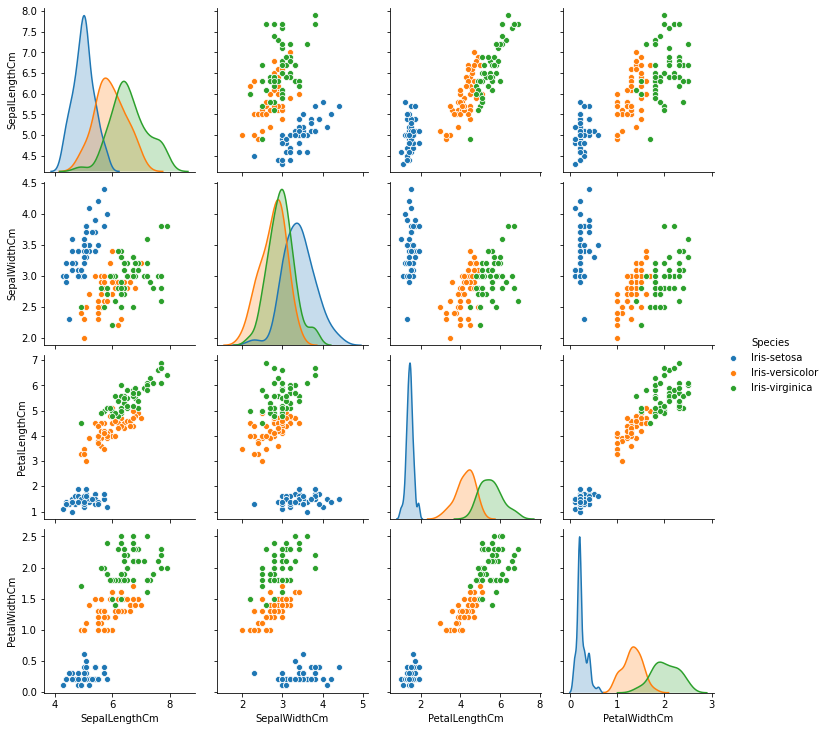

In [12]:
# checking the distribution of the data.
sns.pairplot(df,hue='Species')

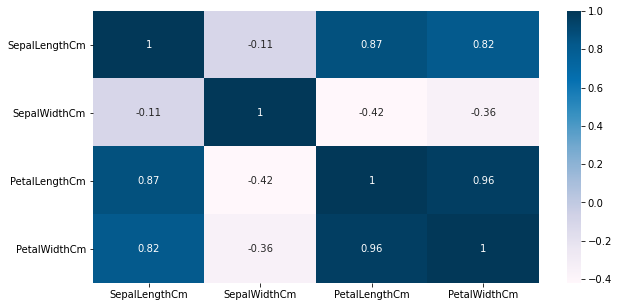

In [13]:
#Checking correlation of the data
cor = df.corr()
sns.heatmap(cor,annot=True,cmap='PuBu')

### Performing K-means Clustering

In [14]:
X = df.iloc[:,[0, 1, 2, 3]].values

In [15]:
from sklearn.cluster import KMeans

In [16]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

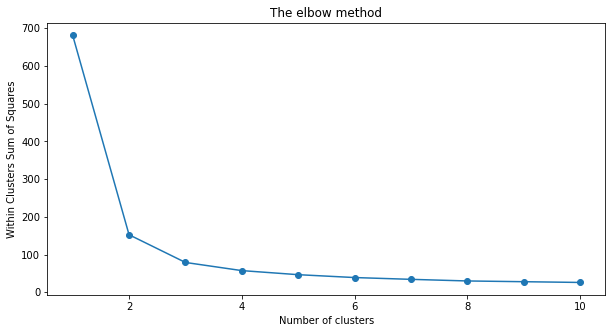

In [17]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Clusters Sum of Squares') 
plt.show()

The above elbow graph shows the possible number of clusters. we get optimum number of clusters at a point where the y coordinate doesn't decrease sigificantly and tends to be parallel to X axis
hence we can safely choose 3 clusters as optimal number of clusters

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

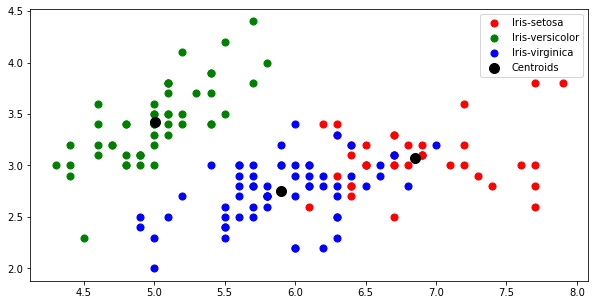

In [20]:
# using scatter plot to see the clusters and Centroids

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],s=50, c= 'red',label='Iris-setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],s=50, c= 'green',label='Iris-versicolor')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],s=50, c= 'blue',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c= 'black',label='Centroids')

plt.legend()
plt.show()

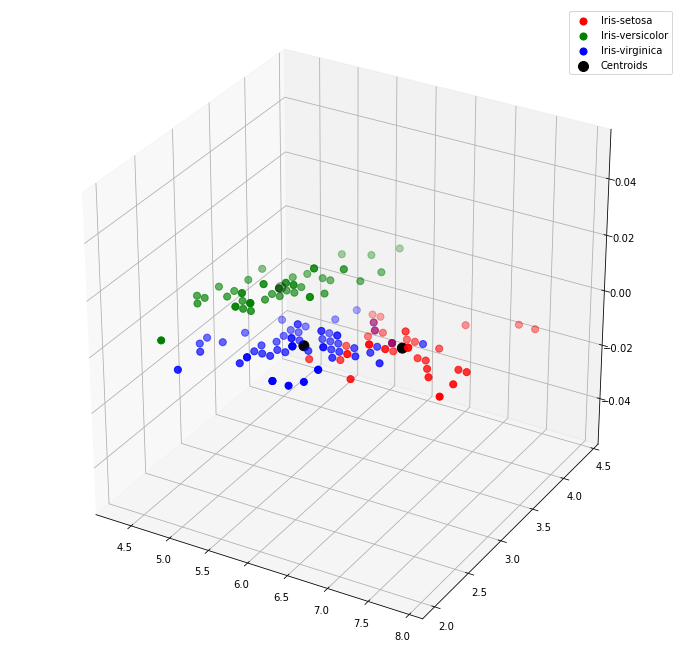

In [36]:

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],s=50, c= 'red',label='Iris-setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],s=50, c= 'green',label='Iris-versicolor')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],s=50, c= 'blue',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c= 'black',label='Centroids')

plt.legend()
plt.show()

In [23]:
# Number of Iterations performed

kmeans.n_iter_

3

In [24]:
df1 = df.copy()
df1['Predicted_Species'] = kmeans.labels_
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_Species
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,0
147,6.3,2.5,5.0,1.9,Iris-virginica,2
148,6.5,3.0,5.2,2.0,Iris-virginica,0


In [25]:
# Checking for any errors

for i in df1['Species'].value_counts().index:
    
    print(i,'\n',df1.loc[df1['Species'] == i]['Predicted_Species'].value_counts(),'\n')

Iris-setosa 
 1    50
Name: Predicted_Species, dtype: int64 

Iris-virginica 
 0    36
2    14
Name: Predicted_Species, dtype: int64 

Iris-versicolor 
 2    48
0     2
Name: Predicted_Species, dtype: int64 



We can see that the model has identified Iris-setosa with maximum accuracy followed by Iris-versicolor and minimum accuracy for Iris-virginica

In [26]:
# encoding the Species
df1['Actual_species'] = df1['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_Species,Actual_species
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,0,2
147,6.3,2.5,5.0,1.9,Iris-virginica,2,2
148,6.5,3.0,5.2,2.0,Iris-virginica,0,2


### Cluster Evaluation

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print(classification_report(df1['Actual_species'],df1['Predicted_Species']))

              precision    recall  f1-score   support

           0       0.05      0.04      0.05        50
           1       1.00      1.00      1.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.44       150
   macro avg       0.43      0.44      0.43       150
weighted avg       0.43      0.44      0.43       150



0 denotes Iris-versicolor 1 denotes Iris-setosa, 2 denotes Iris-virginica 

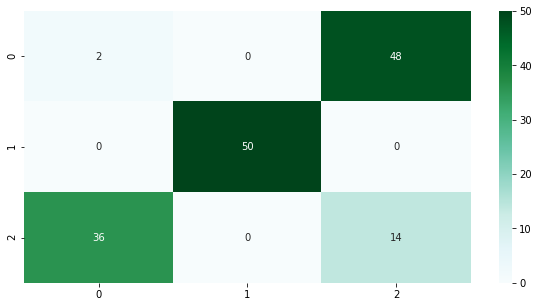

In [29]:
sns.heatmap(confusion_matrix(df1['Actual_species'],df1['Predicted_Species']), annot=True,cmap='BuGn');